<a href="https://colab.research.google.com/github/mukul-mschauhan/GenerativeAI/blob/main/Sentiment_Analysis_An_Intro_to_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

We are going to Build a Sentiment Analysis Model that will take the Reviews of the customers and try to predict the Sentiment. The Sentiment can be **positive**, **neutral** or **negative**.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
tweets = pd.read_csv("/content/Tweets.csv")

tweets.head() # text and airline Sentiment

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
mydf = tweets.loc[:, ["text", "airline_sentiment"]]
mydf.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [ ]:
mydf.text.unique()

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       ...,
       '@AmericanAir Please bring American Airlines to #BlackBerry10',
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",
       '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'],
      dtype=object)

In [ ]:
sample_text = "@VirginAmerica plus you've added commercials to the experience... tacky."

import re # Regular Expressions
import nltk # NLP Library ~ Spacy

# Download the Stopwords
nltk.download("stopwords")

from nltk.corpus import stopwords

stop_words = stopwords.words("english") # List of the Stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Remove the Stopwords

words = sample_text.split() # Tokens
newtext = " ".join([word for word in words if word not in stop_words])

In [ ]:
print(sample_text)
print(newtext)

@VirginAmerica plus you've added commercials to the experience... tacky.
@VirginAmerica plus added commercials experience... tacky.


In [ ]:
for word in words:
  if word not in stop_words:
    print(word)

[word for word in words if word not in stop_words]

@VirginAmerica
plus
added
commercials
experience...
tacky.


['@VirginAmerica', 'plus', 'added', 'commercials', 'experience...', 'tacky.']

In [ ]:
def remove_stop(text):
  text = text.lower() # convert the sentence into lower case
  words = text.split() # Tokens
  newtext = " ".join([word for word in words if word not in stop_words])
  return newtext

In [ ]:
sample = '''@AmericanAir you have my money, you change my flight,
and don't answer your phones! Any other suggestions so I can make my commitment??'''

print(sample)
newtext = remove_stop(sample)
print(newtext)

@AmericanAir you have my money, you change my flight, 
and don't answer your phones! Any other suggestions so I can make my commitment??
@americanair money, change flight, answer phones! suggestions make commitment??


In [ ]:
# Reg Exp: @\w+|[^a-zA-Z\s]

def clean_text(text):
  text = text.lower() # convert the sentence into lower case
  text = re.sub("@\w+|[^a-zA-Z\s]", " ", text)# Clean the Text
  text = re.sub("\s+", " ", text) # Addnl Whitespace Characters
  return(text.strip()) # Trim the additional text if any

print(newtext)
print(clean_text(newtext))

@americanair money, change flight, answer phones! suggestions make commitment??
money change flight answer phones suggestions make commitment


In [ ]:
# Special Characters/Noisy Element exist in the data...

def preview(text):
  text = re.findall("@\w+|[^a-zA-Z\s]",text)
  return text

mydf["noise"] = mydf.text.apply(preview)

mynoise = set(char for sublist in mydf.noise for char in sublist)
sorted_noise = sorted(mynoise)
print(sorted_noise)

In [ ]:
# Function that has Stopwords, Lowercase, Dealing with Noise & Its Removal
def final(text):
  text = text.lower() # convert the sentence into lower case
  words = text.split() # Tokens
  text = " ".join([word for word in words if word not in stop_words])
  text = re.sub("@\w+|[^a-zA-Z\s]", " ", text)# Clean the Text
  text = re.sub("\s+", " ", text) # Addnl Whitespace Characters
  return(text.strip()) # Trim the additional text if any

In [ ]:
# Clean the reviews column in the dataset
mydf["Cleansed_Text"] = mydf.text.apply(final)

### Text Visualization

In [ ]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize # Convert the Sentences into Tokens

nltk.download("punkt_tab")
#for word in mydf.Cleansed_Text:
  #for tokens in word_tokenize(word):
    #print(tokens)

all_tokens = [tokens for word in mydf.Cleansed_Text for tokens in word_tokenize(word)]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# Df
pd.DataFrame(FreqDist(all_tokens).items(), columns = ["Tokens", "Freq"]).\
sort_values(by = "Freq", ascending = False).head(100)

,Tokens,Freq
29,flight,3958
43,t,1875
94,i,1371
204,get,1342
55,co,1214
...,...,...
152,love,245
877,worst,244
246,number,244
201,ll,243


In [ ]:
# Custom StopList
stops = ['ve', 'http', 'https', 'www', 'u', 'm',
         's', 'i', 't', 'w', 'll', 'co', "you"]

def remove_customstop(text):
  text = text.lower() # convert the sentence into lower case
  words = text.split() # Tokens
  return(" ".join([word for word in words if word not in stops]))

mydf["Cleansed"] = mydf["Cleansed_Text"].apply(remove_customstop)

In [ ]:
all_tokens = [tokens for word in mydf.Cleansed for tokens in word_tokenize(word)]

freqdf = pd.DataFrame(FreqDist(all_tokens).items(), columns = ["Tokens", "Freq"]).\
sort_values(by = "Freq", ascending = False)

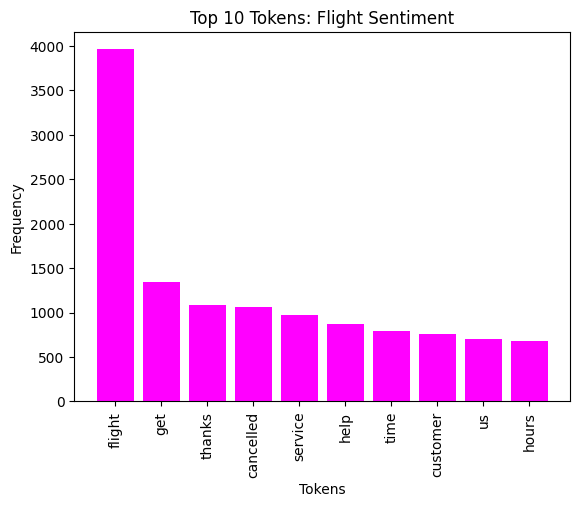

In [ ]:
# Visualize the df
plt.bar(freqdf.Tokens[:10], freqdf.Freq[:10], color = "magenta")
plt.title("Top 10 Tokens: Flight Sentiment")
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.show()

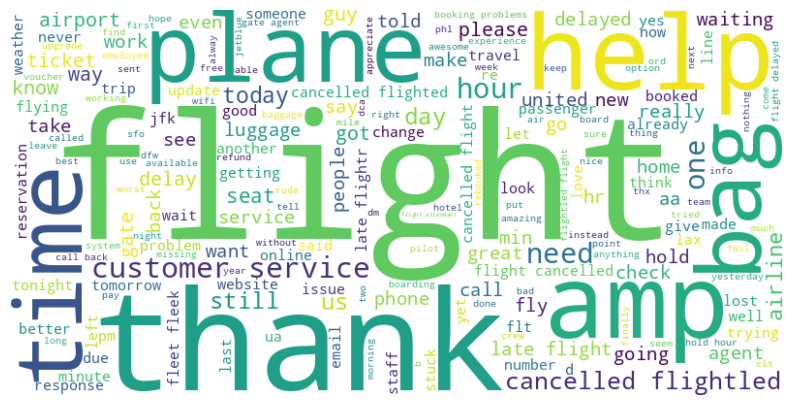

In [ ]:
# Word Cloud
from wordcloud import WordCloud

wordcloud = WordCloud(height = 400, width = 800, background_color = "white").\
generate(" ".join(all_tokens))

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

### Text PreProcessing

* Stopwords
* Created a List of the Noisy Elements
* Clean the Data using Regex (Regex101)
* Frequency Table of the Tokens
* Custom StopList to remove what is left over.
* Top 10 Tokens Frequency Distribution
* Word Cloud

### Model Building Stage
* CountVectorizer (Bag of Words)
* TFIDF Vectorizer

Compare the Results.



In [ ]:
mydf.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

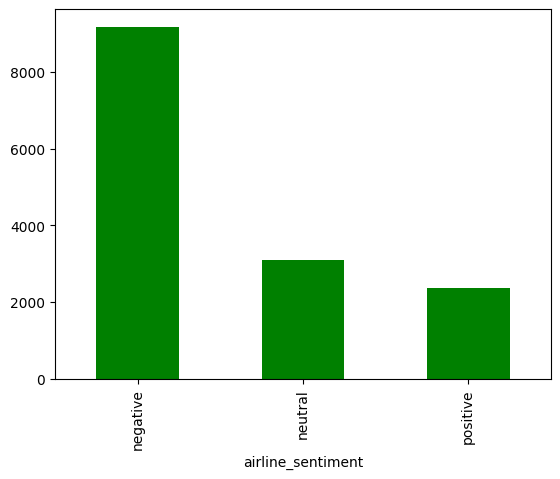

In [ ]:
mydf.airline_sentiment.value_counts().plot(kind = "bar", color = "green")
plt.show()

In [ ]:
# Map the Sentiment into 0, 1, 2
mapped = {"negative":2, "positive":1, "neutral":0}
mydf["Target"] = mydf.airline_sentiment.map(mapped)

### Model Building: Bagof Words

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the Data into Train and Test

X = mydf.Cleansed
y = mydf.Target
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20,
                                                random_state = 0)


In [ ]:
# Count Vectorizer
vectorizer = CountVectorizer()

# Fit and Transform on Train
xtrain_cv = vectorizer.fit_transform(xtrain)

# Transform on Text
xtest_cv = vectorizer.transform(xtest)

In [ ]:
# Model & Generate the Classification Report
model = LogisticRegression()

# Train the Model
model.fit(xtrain_cv, ytrain)

# Predictions
pred = model.predict(xtest_cv)

# Evaluate the Model
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.59      0.58      0.59       614
           1       0.74      0.66      0.70       444
           2       0.85      0.88      0.86      1870

    accuracy                           0.78      2928
   macro avg       0.73      0.71      0.72      2928
weighted avg       0.78      0.78      0.78      2928



In [ ]:
model = RandomForestClassifier()

# Train the Model
model.fit(xtrain_cv, ytrain)

# Predictions
pred = model.predict(xtest_cv)

# Evaluate the Model
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.58      0.50      0.54       580
           1       0.71      0.60      0.65       459
           2       0.82      0.89      0.86      1889

    accuracy                           0.77      2928
   macro avg       0.71      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928



In [ ]:
# TFIDF + Logistic Regression

tfidf = TfidfVectorizer()

tfidf_xtrain = tfidf.fit_transform(xtrain)
tfidf_xtest = tfidf.transform(xtest)

model = LogisticRegression()
pred_tfidf = model.fit(tfidf_xtrain, ytrain).predict(tfidf_xtest)

print(classification_report(ytest, pred_tfidf))

              precision    recall  f1-score   support

           0       0.67      0.46      0.55       614
           1       0.80      0.58      0.67       444
           2       0.80      0.94      0.87      1870

    accuracy                           0.78      2928
   macro avg       0.76      0.66      0.69      2928
weighted avg       0.78      0.78      0.77      2928



In [ ]:
rf = RandomForestClassifier(criterion = "entropy")
pred_rf = rf.fit(tfidf_xtrain, ytrain).predict(tfidf_xtest)

print(classification_report(ytest, pred_rf))

              precision    recall  f1-score   support

           0       0.61      0.46      0.52       614
           1       0.75      0.54      0.63       444
           2       0.80      0.92      0.85      1870

    accuracy                           0.76      2928
   macro avg       0.72      0.64      0.67      2928
weighted avg       0.75      0.76      0.75      2928



* In comparison to the Count Vectorizer, TFIDF is much better
* TFIDF works on Frequency where as CountVectorizer is the Bag of Words and hence treats all the Words Separately.

* Wherein TFIDF fails where the frequency becomes same.

### What can be a better Text Processing Fn
* Word Embeddings Models - Word2Vec Model, FastText, Gensim Model

In [ ]:
# Word Embeddings...
import gensim.downloader as api
model = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
# Most Similar....
model.most_similar([model["king"]], topn = 10)

# Cosine Similarity - It will return if two words are similar in nature...

[('king', 1.0),
 ('prince', 0.7682328820228577),
 ('queen', 0.7507690787315369),
 ('son', 0.7020888328552246),
 ('brother', 0.6985775232315063),
 ('monarch', 0.6977890729904175),
 ('throne', 0.6919989585876465),
 ('kingdom', 0.6811409592628479),
 ('father', 0.6802029013633728),
 ('emperor', 0.6712858080863953)]

In [ ]:
# vector for King
king = model["king"]

# Vector for Queen
queen = model["queen"]

# Vector for employee
employee = model["employee"]

In [ ]:
# Code for Cosine Similarity

from numpy import dot
from numpy.linalg import norm

# King Vs Queen
cos_sim = dot(king, queen)/(norm(king)*norm(queen))
cos_sim

0.750769

In [ ]:
# Queen vs Employee
cos_sim = dot(queen, employee)/(norm(queen)*norm(employee))
cos_sim

0.13364634

In [ ]:
# Vector for Apple
apple = model["apple"]

# Vector for Ball
ball = model["banana"]

# Queen vs Employee
cos_sim = dot(apple, ball)/(norm(apple)*norm(ball))
cos_sim

0.5054469